In [45]:
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
import pandas as pd
import seaborn as sns
import warnings

warnings.filterwarnings("ignore")

In [3]:
# read in the cities df 
cities_df = pd.read_csv('../earthquake_city_data/Cities_df')
cities_df.head()

,Unnamed: 0,id,time,location,latitude,longitude,depth,magnitude,alert,url,eventtype,significance,City
0,0,ci9132068,2000-01-01 12:30:37.190,"13km NE of Yucaipa, California",34.116,-116.940,3.237,1.44,NaN,https://earthquake.usgs.gov/earthquakes/eventp...,earthquake,32,Los_Angeles
1,1,ci9132076,2000-01-01 13:56:15.960,"8km SSW of Idyllwild, California",33.677,-116.759,20.746,1.30,NaN,https://earthquake.usgs.gov/earthquakes/eventp...,earthquake,26,Los_Angeles
2,2,ci9132077,2000-01-01 14:24:46.730,"5km NE of Running Springs, California",34.238,-117.063,8.960,1.60,NaN,https://earthquake.usgs.gov/earthquakes/eventp...,earthquake,39,Los_Angeles
3,3,ci9132083,2000-01-01 15:14:15.740,"9km N of Yucaipa, California",34.112,-117.027,7.307,1.70,NaN,https://earthquake.usgs.gov/earthquakes/eventp...,earthquake,44,Los_Angeles
4,4,ci9132121,2000-01-01 20:13:05.180,"1km S of Encino, California",34.149,-118.500,8.910,1.30,NaN,https://earthquake.usgs.gov/earthquakes/eventp...,earthquake,26,Los_Angeles


In [4]:
# read in the pager df
pager_df = pd.read_csv('../main_data/pager_df')
pager_df.head()

,id,location,time,latitude,longitude,depth,magnitude,country,pager_version,mmi1,mmi2,mmi3,mmi4,mmi5,mmi6,mmi7,mmi8,mmi9,mmi10
0,ci9627721,"6km NNW of Big Bear Lake, CA",2001-02-10 21:05:05.780,34.289500,-116.945833,7.611,4.66,Total,1,7124876,2169417,484915,18251,1341,0,0,0,0,0
1,ci9627953,"6km NNW of Big Bear Lake, CA",2001-02-11 00:39:15.970,34.287500,-116.941833,6.611,4.22,Total,1,9580197,37886,14068,1281,0,0,0,0,0,0
2,ci9695397,"9km SE of San Clemente Is. (SE tip), CA",2001-08-16 18:04:33.770,32.759500,-118.288167,6.710,4.36,Total,1,2914368,2,0,0,0,0,0,0,0,0
3,ci9695549,"10km SSE of San Clemente Is. (SE tip), CA",2001-08-16 22:06:27.870,32.734167,-118.317667,9.662,4.17,Total,1,2272601,0,0,0,0,0,0,0,0,0
4,ci9703873,"2km SE of Beverly Hills, CA",2001-09-09 23:59:18.040,34.059000,-118.388500,7.797,4.24,Total,1,8625269,3788902,2361232,605654,105495,0,0,0,0,0


In [36]:
pager_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201 entries, 0 to 200
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             201 non-null    object 
 1   location       201 non-null    object 
 2   time           201 non-null    object 
 3   latitude       201 non-null    float64
 4   longitude      201 non-null    float64
 5   depth          201 non-null    float64
 6   magnitude      201 non-null    float64
 7   country        201 non-null    object 
 8   pager_version  201 non-null    int64  
 9   mmi1           201 non-null    int64  
 10  mmi2           201 non-null    int64  
 11  mmi3           201 non-null    int64  
 12  mmi4           201 non-null    int64  
 13  mmi5           201 non-null    int64  
 14  mmi6           201 non-null    int64  
 15  mmi7           201 non-null    int64  
 16  mmi8           201 non-null    int64  
 17  mmi9           201 non-null    int64  
 18  mmi10     

In [5]:
columns_join_pager = pager_df[['id', 'country', 'pager_version', 
                               'mmi1', 'mmi2', 'mmi3','mmi4',
                               'mmi5','mmi6','mmi7','mmi8','mmi9','mmi10',]]
columns_join_pager

,id,country,pager_version,mmi1,mmi2,mmi3,mmi4,mmi5,mmi6,mmi7,mmi8,mmi9,mmi10
0,ci9627721,Total,1,7124876,2169417,484915,18251,1341,0,0,0,0,0
1,ci9627953,Total,1,9580197,37886,14068,1281,0,0,0,0,0,0
2,ci9695397,Total,1,2914368,2,0,0,0,0,0,0,0,0
3,ci9695549,Total,1,2272601,0,0,0,0,0,0,0,0,0
4,ci9703873,Total,1,8625269,3788902,2361232,605654,105495,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
196,nc73799091,Total,1,113118,7036236,6568832,1149983,4567,0,0,0,0,0
197,nc73866925,Total,1,3643412,5860495,4871432,10731,45729,0,0,0,0,0
198,nc73871215,Total,1,9324443,3781770,88575,7137,1726,0,0,0,0,0
199,nc73895826,Total,1,7225518,5766675,303109,6457,117,0,0,0,0,0


In [6]:
dyfi_df = pd.read_csv('../main_data/dyfi_csv_new')
dyfi_df.head()

,lat,lon,stddev,nresp,station,intensity,distance,id,Standard deviation,cityid
0,36.709540,-121.650847,0.33,1,UTM:(10S 0620 4063 1000),2.2,504,ci9627721,NaN,NaN
1,38.606415,-121.283030,0.33,1,UTM:(10S 0649 4274 1000),3.4,617,ci9627721,NaN,NaN
2,45.238860,-122.827995,0.33,1,UTM:(10T 0513 5009 1000),1.0,1316,ci9627721,NaN,NaN
3,34.441407,-119.737257,0.33,1,UTM:(11S 0248 3814 1000),1.0,257,ci9627721,NaN,NaN
4,35.382470,-119.108288,0.33,1,UTM:(11S 0308 3917 1000),1.0,232,ci9627721,NaN,NaN


In [40]:
test_eq = dyfi_df[dyfi_df['id'] == 'ci9627721']

<Axes: xlabel='distance', ylabel='intensity'>

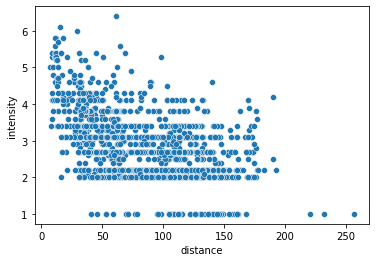

In [49]:
sns.scatterplot(data = test_eq[test_eq['distance'] < 500], x = 'distance', y = 'intensity')

<Axes: xlabel='distance', ylabel='intensity'>

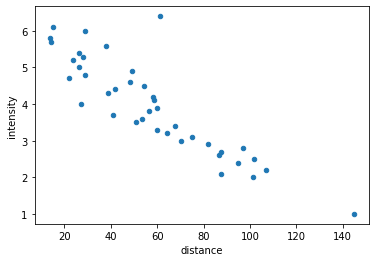

In [53]:
test_eq.groupby('intensity')['distance'].mean().reset_index().plot(kind='scatter', x = 'distance', y='intensity')

In [37]:
dyfi_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240951 entries, 0 to 240950
Data columns (total 10 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   lat                 240951 non-null  float64
 1   lon                 240951 non-null  float64
 2   stddev              216765 non-null  float64
 3   nresp               240951 non-null  int64  
 4   station             240951 non-null  object 
 5   intensity           240951 non-null  float64
 6   distance            240951 non-null  int64  
 7   id                  240951 non-null  object 
 8   Standard deviation  3 non-null       float64
 9   cityid              0 non-null       float64
dtypes: float64(6), int64(2), object(2)
memory usage: 18.4+ MB


In [7]:
## Join the pager_df to the cities df but only grab the id columns and the everything after paper vision
pager_city_join = pd.merge(cities_df, columns_join_pager, on = 'id', how = 'left')
pager_city_join.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1684570 entries, 0 to 1684569
Data columns (total 25 columns):
 #   Column         Non-Null Count    Dtype  
---  ------         --------------    -----  
 0   Unnamed: 0     1684570 non-null  int64  
 1   id             1684570 non-null  object 
 2   time           1684570 non-null  object 
 3   location       1684549 non-null  object 
 4   latitude       1684570 non-null  float64
 5   longitude      1684570 non-null  float64
 6   depth          1684567 non-null  float64
 7   magnitude      1620183 non-null  float64
 8   alert          465 non-null      object 
 9   url            1684570 non-null  object 
 10  eventtype      1684570 non-null  object 
 11  significance   1684570 non-null  int64  
 12  City           1684570 non-null  object 
 13  country        465 non-null      object 
 14  pager_version  465 non-null      float64
 15  mmi1           465 non-null      float64
 16  mmi2           465 non-null      float64
 17  mmi3    

In [8]:
pager_city_join.head()

,Unnamed: 0,id,time,location,latitude,longitude,depth,magnitude,alert,url,...,mmi1,mmi2,mmi3,mmi4,mmi5,mmi6,mmi7,mmi8,mmi9,mmi10
0,0,ci9132068,2000-01-01 12:30:37.190,"13km NE of Yucaipa, California",34.116,-116.940,3.237,1.44,NaN,https://earthquake.usgs.gov/earthquakes/eventp...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,ci9132076,2000-01-01 13:56:15.960,"8km SSW of Idyllwild, California",33.677,-116.759,20.746,1.30,NaN,https://earthquake.usgs.gov/earthquakes/eventp...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,ci9132077,2000-01-01 14:24:46.730,"5km NE of Running Springs, California",34.238,-117.063,8.960,1.60,NaN,https://earthquake.usgs.gov/earthquakes/eventp...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,ci9132083,2000-01-01 15:14:15.740,"9km N of Yucaipa, California",34.112,-117.027,7.307,1.70,NaN,https://earthquake.usgs.gov/earthquakes/eventp...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,ci9132121,2000-01-01 20:13:05.180,"1km S of Encino, California",34.149,-118.500,8.910,1.30,NaN,https://earthquake.usgs.gov/earthquakes/eventp...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
len(dyfi_df)

240951

In [59]:
## groupby the dyfi dataframe by the Id
dyfi_grouped = dyfi_df.groupby(['id', 'intensity'])[['distance']].mean().reset_index()
dyfi_grouped

,id,intensity,distance
0,ci10275733,1.0,74.558824
1,ci10275733,2.0,69.410749
2,ci10275733,2.1,62.967742
3,ci10275733,2.2,74.239535
4,ci10275733,2.3,55.000000
...,...,...,...
3210,nc73895826,4.9,8.000000
3211,nc73895826,5.3,20.000000
3212,nc73895826,5.5,17.000000
3213,nc73895826,5.8,10.000000


<Axes: xlabel='distance', ylabel='intensity'>

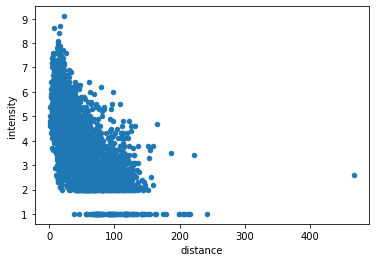

In [62]:
dyfi_grouped[dyfi_grouped['distance'] < 500].plot(kind='scatter', x = 'distance', y='intensity')

<Axes: xlabel='distance', ylabel='intensity'>

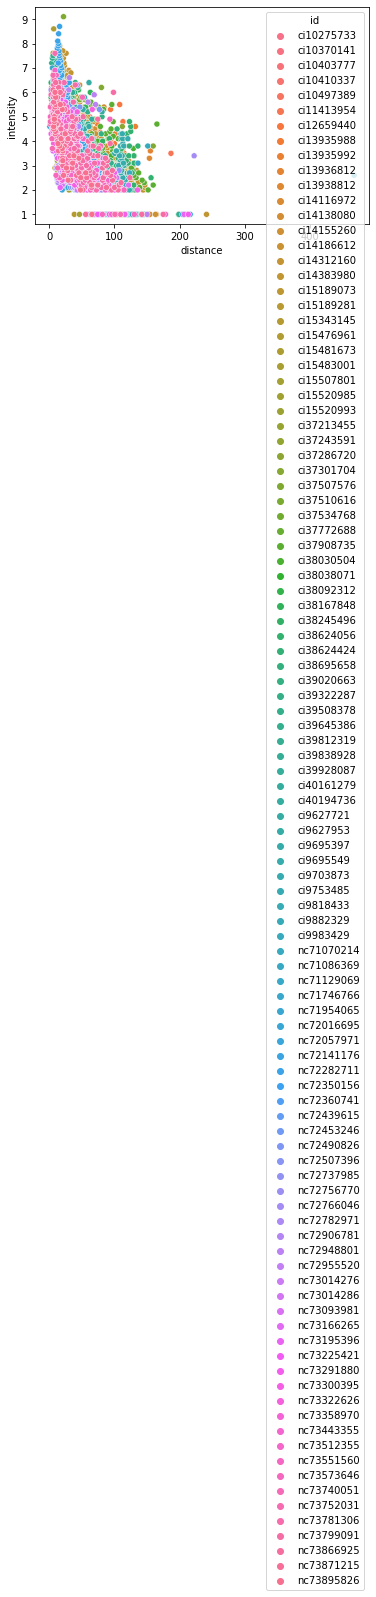

In [66]:
sns.scatterplot(data = dyfi_grouped[dyfi_grouped['distance'] < 500] , x = 'distance', y='intensity', hue = 'id')

In [63]:
all_csv_combined = pd.merge(pager_city_join, dyfi_grouped, on = 'id', how = 'left')

In [73]:
all_csv_combined['City'].value_counts()

City
San_Diego        490827
San_Francisco    490827
San_Jose         490827
Los_Angeles      224374
Name: count, dtype: int64

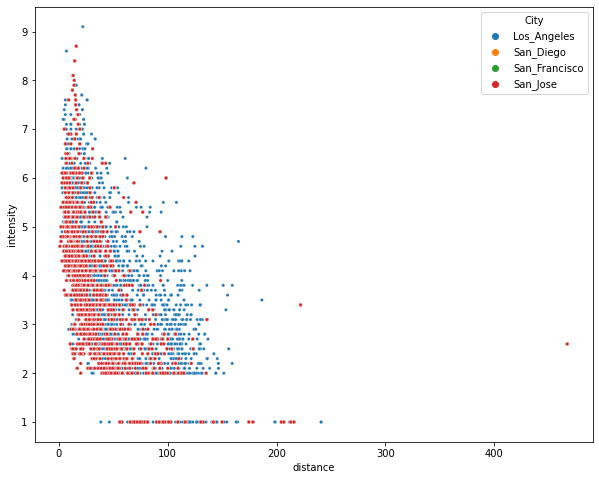

In [72]:
figure = plt.figure(figsize = (10,8))
sns.scatterplot(data = all_csv_combined[all_csv_combined['distance'] < 500] , x = 'distance', 
                y='intensity', 
                hue = 'City',
               s = 10);

In [64]:
len(all_csv_combined)

1696855

In [13]:
all_csv_combined.head()

,Unnamed: 0,id,time,location,latitude,longitude,depth,magnitude,alert,url,...,mmi3,mmi4,mmi5,mmi6,mmi7,mmi8,mmi9,mmi10,intensity,distance
0,0,ci9132068,2000-01-01 12:30:37.190,"13km NE of Yucaipa, California",34.116,-116.940,3.237,1.44,NaN,https://earthquake.usgs.gov/earthquakes/eventp...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,ci9132076,2000-01-01 13:56:15.960,"8km SSW of Idyllwild, California",33.677,-116.759,20.746,1.30,NaN,https://earthquake.usgs.gov/earthquakes/eventp...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,ci9132077,2000-01-01 14:24:46.730,"5km NE of Running Springs, California",34.238,-117.063,8.960,1.60,NaN,https://earthquake.usgs.gov/earthquakes/eventp...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,ci9132083,2000-01-01 15:14:15.740,"9km N of Yucaipa, California",34.112,-117.027,7.307,1.70,NaN,https://earthquake.usgs.gov/earthquakes/eventp...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,ci9132121,2000-01-01 20:13:05.180,"1km S of Encino, California",34.149,-118.500,8.910,1.30,NaN,https://earthquake.usgs.gov/earthquakes/eventp...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
all_csv_combined.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1684570 entries, 0 to 1684569
Data columns (total 27 columns):
 #   Column         Non-Null Count    Dtype  
---  ------         --------------    -----  
 0   Unnamed: 0     1684570 non-null  int64  
 1   id             1684570 non-null  object 
 2   time           1684570 non-null  object 
 3   location       1684549 non-null  object 
 4   latitude       1684570 non-null  float64
 5   longitude      1684570 non-null  float64
 6   depth          1684567 non-null  float64
 7   magnitude      1620183 non-null  float64
 8   alert          465 non-null      object 
 9   url            1684570 non-null  object 
 10  eventtype      1684570 non-null  object 
 11  significance   1684570 non-null  int64  
 12  City           1684570 non-null  object 
 13  country        465 non-null      object 
 14  pager_version  465 non-null      float64
 15  mmi1           465 non-null      float64
 16  mmi2           465 non-null      float64
 17  mmi3    

In [74]:
# Get all rows where 'alert' is not null
get_data_w_alerts_2 = all_csv_combined[all_csv_combined['alert'].notna()]

# Get a random sample of 20,000 rows from the rows where 'alert' is null
subset_from_combined_df_3 = all_csv_combined[all_csv_combined['alert'].isna()].sample(n=20000)

# Concatenate the two DataFrames
combined_subset_2 = pd.concat([get_data_w_alerts_2, subset_from_combined_df_3])

In [83]:
combined_subset_2.to_csv('main_dataset')

In [17]:
combined_subset_2.head()

,Unnamed: 0,id,time,location,latitude,longitude,depth,magnitude,alert,url,...,mmi3,mmi4,mmi5,mmi6,mmi7,mmi8,mmi9,mmi10,intensity,distance
4937,4937,ci9627721,2001-02-10 21:05:05.780,"6km NNW of Big Bear Lake, CA",34.289500,-116.945833,7.611,4.66,green,https://earthquake.usgs.gov/earthquakes/eventp...,...,484915.0,18251.0,1341.0,0.0,0.0,0.0,0.0,0.0,4703.7,139051.0
4967,4967,ci9627953,2001-02-11 00:39:15.970,"6km NNW of Big Bear Lake, CA",34.287500,-116.941833,6.611,4.22,green,https://earthquake.usgs.gov/earthquakes/eventp...,...,14068.0,1281.0,0.0,0.0,0.0,0.0,0.0,0.0,486.0,12254.0
7318,7318,ci9695397,2001-08-16 18:04:33.770,"9km SE of San Clemente Is. (SE tip), CA",32.759500,-118.288167,6.710,4.36,green,https://earthquake.usgs.gov/earthquakes/eventp...,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,946.6,43559.0
7323,7323,ci9695549,2001-08-16 22:06:27.870,"10km SSE of San Clemente Is. (SE tip), CA",32.734167,-118.317667,9.662,4.17,green,https://earthquake.usgs.gov/earthquakes/eventp...,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,474.5,22529.0
7559,7559,ci9703873,2001-09-09 23:59:18.040,"2km SE of Beverly Hills, CA",34.059000,-118.388500,7.797,4.24,green,https://earthquake.usgs.gov/earthquakes/eventp...,...,2361232.0,605654.0,105495.0,0.0,0.0,0.0,0.0,0.0,4426.2,49915.0


In [18]:
combined_subset_2.sort_values(by = 'id', ascending = False)

,Unnamed: 0,id,time,location,latitude,longitude,depth,magnitude,alert,url,...,mmi3,mmi4,mmi5,mmi6,mmi7,mmi8,mmi9,mmi10,intensity,distance
1177693,55865,nc99686,1987-05-02 16:03:56.030,"4 km SSW of Gilroy, California",36.967333,-121.595833,5.876,1.18,NaN,https://earthquake.usgs.gov/earthquakes/eventp...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1177632,55804,nc99677,1987-04-30 21:44:33.100,"5 km NNE of Tres Pinos, California",36.829000,-121.292667,7.041,NaN,NaN,https://earthquake.usgs.gov/earthquakes/eventp...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1177626,55798,nc99539,1987-04-30 20:43:29.000,"4 km NE of Tres Pinos, California",36.825000,-121.289500,6.821,1.91,NaN,https://earthquake.usgs.gov/earthquakes/eventp...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1665012,55756,nc99436,1987-04-29 05:52:54.970,"4 km E of Union City, California",37.588833,-121.966333,9.075,0.91,NaN,https://earthquake.usgs.gov/earthquakes/eventp...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
690043,55643,nc99146,1987-04-24 12:02:41.560,Northern California,38.791167,-122.828500,2.185,2.24,NaN,https://earthquake.usgs.gov/earthquakes/eventp...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18082,18082,ci10009145,2004-05-15 18:56:40.740,"9km S of Idyllwild, California",33.656333,-116.727500,15.351,0.75,NaN,https://earthquake.usgs.gov/earthquakes/eventp...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
18065,18065,ci10008665,2004-05-13 23:28:58.870,"10km NNW of Idyllwild, CA",33.824000,-116.753833,16.351,1.57,NaN,https://earthquake.usgs.gov/earthquakes/eventp...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
18036,18036,ci10008225,2004-05-13 05:26:34.610,"0km SSW of Loma Linda, CA",34.045333,-117.263167,12.159,2.15,NaN,https://earthquake.usgs.gov/earthquakes/eventp...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
18013,18013,ci10007509,2004-05-11 08:26:54.240,"2km E of Yucaipa, CA",34.034333,-117.016333,13.079,1.98,NaN,https://earthquake.usgs.gov/earthquakes/eventp...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


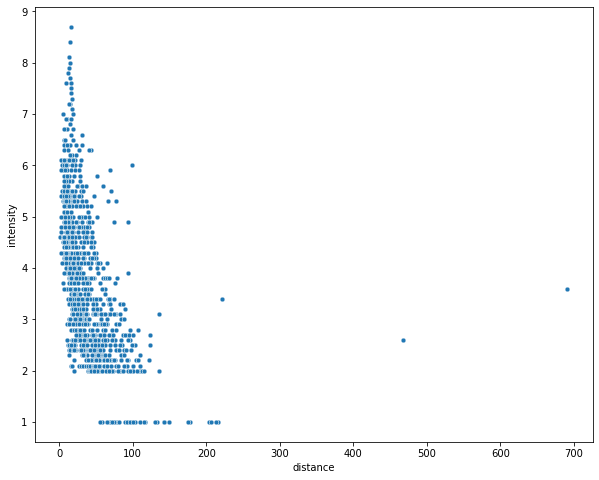

In [82]:
figure = plt.figure(figsize = (10,8))
sns.scatterplot(data = combined_subset_2[combined_subset_2['City'] ==  "San_Jose"] , x = 'distance', 
                y='intensity', 
                #hue = 'City',
               s = 20,
               palette='viridis' );

In [20]:
combined_subset_2['id'].duplicated().sum()

552

In [21]:
combined_subset_2.tail()

,Unnamed: 0,id,time,location,latitude,longitude,depth,magnitude,alert,url,...,mmi3,mmi4,mmi5,mmi6,mmi7,mmi8,mmi9,mmi10,intensity,distance
357232,134946,nc71495285,2010-12-11 03:57:08.460,"9 km WNW of Cobb, California",38.845165,-122.827331,1.839,0.97,NaN,https://earthquake.usgs.gov/earthquakes/eventp...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
839527,129813,nc71444620,2010-08-21 12:14:35.310,"10 km N of Hollister, California",36.948167,-121.401000,9.202,0.59,NaN,https://earthquake.usgs.gov/earthquakes/eventp...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1658977,49721,nc77888,1986-07-31 06:29:53.370,"6 km NE of Ridgemark, California",36.859833,-121.318833,4.228,1.03,NaN,https://earthquake.usgs.gov/earthquakes/eventp...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1408884,211730,nc72257901,2014-07-15 19:21:47.220,"7 km S of Cobb, California",38.757500,-122.731163,2.078,0.49,NaN,https://earthquake.usgs.gov/earthquakes/eventp...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
169874,46133,ci7047892,1996-10-31 20:38:20.220,"24km NNW of Tehachapi, California",35.318000,-118.583000,4.858,1.51,NaN,https://earthquake.usgs.gov/earthquakes/eventp...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
